<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Module%204/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo">
</center>

# Model Development

Estimated time needed: **30** minutes

## Objectives

After completing this lab you will be able to:

*   Develop prediction models


<p>In this section, we will develop several models that will predict the price of the car using the variables or features. This is just an estimate but should give us an objective idea of how much the car should cost.</p>


Some questions we want to ask in this module

<ul>
    <li>Do I know if the dealer is offering fair value for my trade-in?</li>
    <li>Do I know if I put a fair value on my car?</li>
</ul>
<p>In data analytics, we often use <b>Model Development</b> to help us predict future observations from the data we have.</p>

<p>A model will help us understand the exact relationship between different variables and how these variables are used to predict the result.</p>


<h4>Setup</h4>


Import libraries:


you are running the lab in your  browser, so we will install the libraries using `piplite`


In [1]:
#you are running the lab in your  browser, so we will install the libraries using ``piplite``
install.packages("dplyr")
install.packages("ggplot2")
install.packages("scipy")
install.packages("caret")
install.packages("seaborn")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘scipy’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message

If you run the lab locally using Anaconda, you can load the correct library and versions by uncommenting the following:


In [2]:
library(dplyr)
library(ggplot2)
library(tidyr)          # Hỗ trợ trong việc xử lý dữ liệu như numpy trong python
library(readr)

# Tắt các cảnh báo
options(warn = -1)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




This function will download the dataset into your browser


In [3]:
# Sử dụng thư viện httr để tải file từ URL
library(httr)

In [4]:
#This function will download the dataset into your browser

download <- function(url, filename) {
  # Gửi yêu cầu GET đến URL
  response <- GET(url)

  # Kiểm tra nếu yêu cầu thành công (status code 200)
  if (status_code(response) == 200) {
    # Ghi nội dung vào tệp tin
    writeBin(content(response, "raw"), filename)
    message("Download successful: ", filename)
  } else {
    message("Download failed with status: ", status_code(response))
  }
}


This dataset was hosted on IBM Cloud object. Click <a href="https://cocl.us/DA101EN_object_storage?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01">HERE</a> for free storage.


you will need to download the dataset; if you are running locally, please comment out the following


In [5]:
#you will need to download the dataset; if you are running locally, please comment out the following
# Sử dụng download.file để tải xuống tập dữ liệu
download.file(
  url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv",
  destfile = "automobileEDA.csv",
  mode = "wb"
)

# Kiểm tra nếu tệp đã được tải thành công
if (file.exists("automobileEDA.csv")) {
  message("Download successful: automobileEDA.csv")
} else {
  message("Download failed.")
}


Download successful: automobileEDA.csv



Load the data and store it in dataframe `df`:


In [6]:
# Đọc dữ liệu automobileEDA.csv"



,symboling,normalized.losses,make,aspiration,num.of.doors,body.style,drive.wheels,engine.location,wheel.base,length,⋯,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,price,city.L.100km,horsepower.binned,diesel,gas
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>,<int>,<int>
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.8111485,⋯,9.0,111,5000,21,27,13495,11.190476,Medium,0,1
2,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.8111485,⋯,9.0,111,5000,21,27,16500,11.190476,Medium,0,1
3,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.8226814,⋯,9.0,154,5000,19,26,16500,12.368421,Medium,0,1
4,2,164,audi,std,four,sedan,fwd,front,99.8,0.8486305,⋯,10.0,102,5500,24,30,13950,9.791667,Medium,0,1
5,2,164,audi,std,four,sedan,4wd,front,99.4,0.8486305,⋯,8.0,115,5500,18,22,17450,13.055556,Medium,0,1
6,2,122,audi,std,two,sedan,fwd,front,99.8,0.8519942,⋯,8.5,110,5500,19,25,15250,12.368421,Medium,0,1


<h2>1. Linear Regression and Multiple Linear Regression</h2>


<h4>Linear Regression</h4>


<p>One example of a Data  Model that we will be using is:</p>
<b>Simple Linear Regression</b>

<br>
<p>Simple Linear Regression is a method to help us understand the relationship between two variables:</p>
<ul>
    <li>The predictor/independent variable (X)</li>
    <li>The response/dependent variable (that we want to predict)(Y)</li>
</ul>

<p>The result of Linear Regression is a <b>linear function</b> that predicts the response (dependent) variable as a function of the predictor (independent) variable.</p>


$$
Y: Response \ Variable\\\\\\\\\\
X: Predictor \ Variables
$$


<b>Linear Function</b>
$$
Yhat = a + b  X
$$


<ul>
    <li>a refers to the <b>intercept</b> of the regression line, in other words: the value of Y when X is 0</li>
    <li>b refers to the <b>slope</b> of the regression line, in other words: the value with which Y changes when X increases by 1 unit</li>
</ul>


<h4>Let's load the modules for linear regression:</h4>


<h4>Create the linear regression object:</h4>


In [7]:
# Tạo mô hình hồi quy tuyến tính price ~ highway.mpg



Call:
lm(formula = price ~ highway.mpg, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
 -8647  -3411  -1102   1092  20970 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 38423.31    1843.39   20.84   <2e-16 ***
highway.mpg  -821.73      58.65  -14.01   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5653 on 199 degrees of freedom
Multiple R-squared:  0.4966,	Adjusted R-squared:  0.4941 
F-statistic: 196.3 on 1 and 199 DF,  p-value: < 2.2e-16


<h4>How could "highway-mpg" help us predict car price?</h4>


For this example, we want to look at how highway-mpg can help us predict car price.
Using simple linear regression, we will create a linear function with "highway-mpg" as the predictor variable and the "price" as the response variable.


Fit the linear model using highway-mpg:


We can output a prediction:


In [8]:
# Tạo dự đoán lm_model



1        2        3        4        5 
16236.50 16236.50 17058.24 13771.30 20345.17

<h4>What is the value of the intercept (a)?</h4>


In [9]:
# Lấy giá trị intercept (a)


[1] "Intercept: 38423.3058581574"


<h4>What is the value of the slope (b)?</h4>


In [10]:
# Lấy giá trị slope (b)


[1] "Slope: -821.733378321926"


In [11]:
# In phương trình hồi quy


Price = 38423.31 + -821.73 x highway-mpg


<h3>What is the final estimated linear model we get?</h3>


As we saw above, we should get a final linear model with the structure:


$$
Yhat = a + b  X
$$


Plugging in the actual values we get:


<b>Price</b> = 38423.31 - 821.73 x <b>highway-mpg</b>


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question #1 a): </h1>

<b>Create a linear regression object called "lm1".</b>
<b>Train the model using "engine-size" as the independent variable and "price" as the dependent variable?</b>

</div>

</div>


In [12]:
# Write your code below and press Shift+Enter to execute
# Tạo mô hình hồi quy với engine-size




Call:
lm(formula = price ~ engine.size, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-10433.0  -2249.4   -469.8   1370.6  14404.6 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -7963.339    884.835   -9.00   <2e-16 ***
engine.size   166.860      6.629   25.17   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3895 on 199 degrees of freedom
Multiple R-squared:  0.761,	Adjusted R-squared:  0.7598 
F-statistic: 633.5 on 1 and 199 DF,  p-value: < 2.2e-16


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question #1 cb:</h1>

<b>Find the slope and intercept of the model.</b>

</div>


<h4>Slope</h4>


In [13]:
# Write your code below and press Shift+Enter to execute
# Giá trị của hệ số (slope)


engine.size 
     166.86

<h4>Intercept</h4>


In [14]:
# Write your code below and press Shift+Enter to execute
# Giá trị của hằng số (intercept)


(Intercept) 
  -7963.339

In [15]:
# In phương trình


Price = -7963.34 + 166.86 x engine-size


In [16]:
# Tính giá dự đoán price~ engine.size


[1] 13728.46 13728.46 17399.38 10224.40 14729.62 14729.62

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question #1 ): </h1>

<b>What is the equation of the predicted line? You can use x and yhat or "engine-size" or "price".</b>

</div>


Phương trình dự đoán:
Yhat = 38423.31 + -821.73 * X
Price = 38423.31 + -821.73 * engine.size


[1] -68402.03 -68402.03 -86480.17 -51145.63 -73332.43 -73332.43

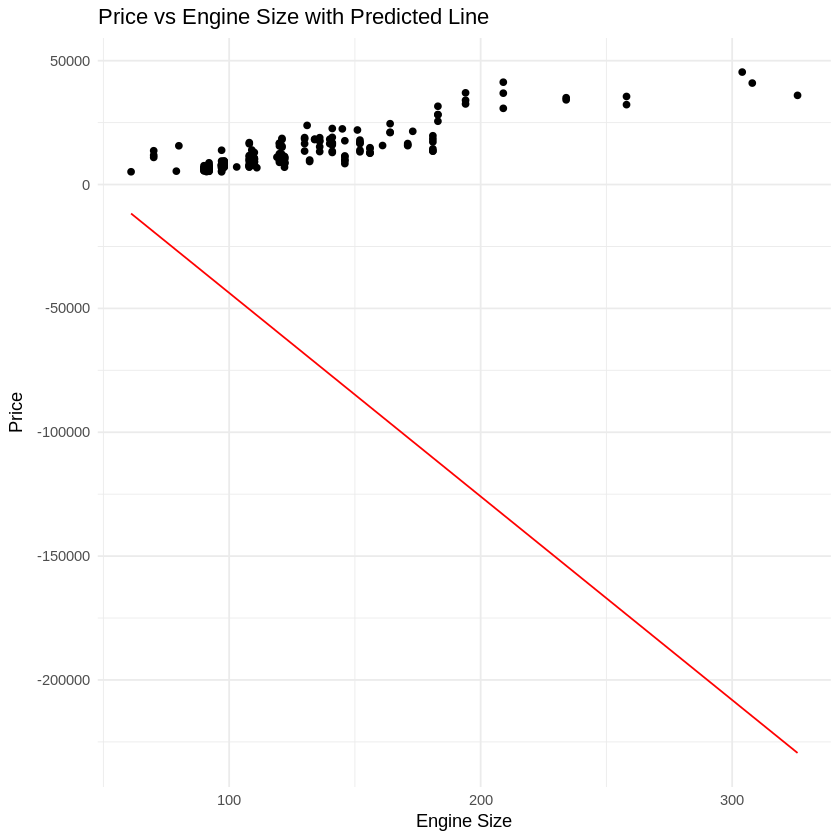

In [17]:
# Write your code below and press Shift+Enter to execute
# using X and Y

# dự đoán trực tiếp từ engine.size
Price <- intercept + slope * df$engine.size

# In kết quả


# Kiểm tra kết quả dự đoán


# Vẽ đồ thị để minh họa


In [18]:
Price

[1]  -68402.03  -68402.03  -86480.17  -51145.63  -73332.43  -73332.43
  [7]  -73332.43  -73332.43  -69223.77  -50323.90  -50323.90  -96340.97
 [13]  -96340.97  -96340.97 -133318.97 -133318.97 -133318.97  -11702.43
 [19]  -35532.70  -35532.70  -35532.70  -35532.70  -42106.57  -35532.70
 [25]  -35532.70  -35532.70  -42106.57  -61828.17  -89767.10  -37176.16
 [31]  -37176.16  -26493.63  -37176.16  -37176.16  -37176.16  -37176.16
 [37]  -51967.37  -51967.37  -51967.37  -51967.37  -51967.37  -51967.37
 [43]  -52789.10  -59362.97 -173583.91 -173583.91 -229461.78  -36354.43
 [49]  -36354.43  -36354.43  -36354.43  -36354.43  -19098.03  -19098.03
 [55]  -19098.03  -27315.36  -61828.17  -61828.17  -61828.17  -61828.17
 [61]  -61828.17  -61828.17  -76619.37  -71688.97 -111953.90 -111953.90
 [67] -111953.90 -111953.90 -153862.30 -153862.30 -214670.57 -211383.64
 [73]  -76619.37  -37176.16  -37176.16  -37176.16  -42106.57  -51967.37
 [79]  -61828.17  -89767.10  -89767.10  -89767.10  -61828.17  -61828.17
 [85]  -51967.37  -51967.37  -41284.83  -46215.23  -41284.83  -41284.83
 [91]  -41284.83  -41284.83  -41284.83  -41284.83  -41284.83  -41284.83
 [97]  -60184.70  -60184.70 -110310.44 -110310.44 -110310.44 -110310.44
[103] -110310.44 -110310.44  -60184.70  -86480.17  -60184.70  -86480.17
[109]  -60184.70  -86480.17  -60184.70  -86480.17  -60184.70  -86480.17
[115]  -71688.97  -35532.70  -42106.57  -35532.70  -35532.70  -42106.57
[121]  -61828.17  -89767.10  -85658.43 -120992.97 -120992.97 -120992.97
[127]  -70045.50  -70045.50  -61006.43  -61006.43  -61006.43  -61006.43
[133]  -61006.43  -61006.43  -41284.83  -50323.90  -50323.90  -50323.90
[139]  -50323.90  -50323.90  -50323.90  -50323.90  -50323.90  -50323.90
[145]  -50323.90  -50323.90  -37176.16  -37176.16  -37176.16  -37176.16
[151]  -37176.16  -37176.16  -42106.57  -42106.57  -51967.37  -51967.37
[157]  -42106.57  -42106.57  -42106.57  -42106.57  -42106.57  -42106.57
[163]  -42106.57  -81549.77  -81549.77  -81549.77  -81549.77  -81549.77
[169]  -81549.77  -61828.17  -51967.37  -61828.17  -61828.17  -61828.17
[175] -102093.10 -102093.10 -102093.10  -93875.77  -41284.83  -51145.63
[181]  -41284.83  -51145.63  -51145.63  -41284.83  -51145.63  -51145.63
[187]  -51145.63  -73332.43  -41284.83  -51145.63  -77441.10  -77441.10
[193]  -77441.10  -77441.10  -68402.03  -68402.03  -77441.10  -77441.10
[199] -103736.57  -80728.03  -77441.10

<h4>Multiple Linear Regression</h4>


<p>What if we want to predict car price using more than one variable?</p>

<p>If we want to use more variables in our model to predict car price, we can use <b>Multiple Linear Regression</b>.
Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and <b>two or more</b> predictor (independent) variables.
Most of the real-world regression models involve multiple predictors. We will illustrate the structure by using four predictor variables, but these results can generalize to any integer:</p>


$$
Y: Response \ Variable\\\\\\\\\\
X\_1 :Predictor\ Variable \ 1\\\\
X\_2: Predictor\ Variable \ 2\\\\
X\_3: Predictor\ Variable \ 3\\\\
X\_4: Predictor\ Variable \ 4\\\\
$$


$$
a: intercept\\\\\\\\\\
b\_1 :coefficients \ of\ Variable \ 1\\\\
b\_2: coefficients \ of\ Variable \ 2\\\\
b\_3: coefficients \ of\ Variable \ 3\\\\
b\_4: coefficients \ of\ Variable \ 4\\\\
$$


The equation is given by:


$$
Yhat = a + b\_1 X\_1 + b\_2 X\_2 + b\_3 X\_3 + b\_4 X\_4
$$


<p>From the previous section  we know that other good predictors of price could be:</p>
<ul>
    <li>Horsepower</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Highway-mpg</li>
</ul>
Let's develop a model using these variables as the predictor variables.


In [19]:
# Tạo mô hình hồi quy đa biến price ~ horsepower + curb.weight + engine.size + highway.mp



Call:
lm(formula = price ~ horsepower + curb.weight + engine.size + 
    highway.mpg, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-8992.6 -1647.2   -70.7  1323.9 13640.3 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -15806.625   4388.993  -3.601 0.000401 ***
horsepower      53.496     14.727   3.632 0.000358 ***
curb.weight      4.708      1.119   4.207 3.94e-05 ***
engine.size     81.530     14.064   5.797 2.66e-08 ***
highway.mpg     36.057     74.167   0.486 0.627390    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3505 on 196 degrees of freedom
Multiple R-squared:  0.8094,	Adjusted R-squared:  0.8055 
F-statistic:   208 on 4 and 196 DF,  p-value: < 2.2e-16


Fit the linear model using the four above-mentioned variables.


In [20]:
# Tạo dự đoán


1        2        3        4        5        6 
16236.50 16236.50 17058.24 13771.30 20345.17 17879.97

What is the value of the intercept(a)?


In [21]:
# Lấy giá trị intercept


[1] "Intercept: -15806.6246263292"


What are the values of the coefficients (b1, b2, b3, b4)?


In [22]:
# Lấy các hệ số


[1] "horsepower coefficient: 53.4957442260494"
[1] "curb.weight coefficient: 4.70770099461394"
[1] "engine.size coefficient: 81.5302638212274"
[1] "highway.mpg coefficient: 36.0574888164858"


In [23]:
# Lấy các hệ số


# In ra phương trình hồi quy


# In ra các hệ số của từng biến


Phương trình hồi quy:
Price = -15806.62 + 53.5 * horsepower + 4.71 * curb.weight + 81.53 * engine.size + 36.06 * highway.mpg 

(Intercept) : -15806.62 
horsepower : 53.5 
curb.weight : 4.71 
engine.size : 81.53 
highway.mpg : 36.06 


What is the final estimated linear model that we get?


As we saw above, we should get a final linear function with the structure:

$$
Yhat = a + b\_1 X\_1 + b\_2 X\_2 + b\_3 X\_3 + b\_4 X\_4
$$

What is the linear function we get in this example?


<b>Price</b> = -15678.742628061467 + 52.65851272 x <b>horsepower</b> + 4.69878948 x <b>curb-weight</b> + 81.95906216 x <b>engine-size</b> + 33.58258185 x <b>highway-mpg</b>


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #2 a): </h1>
Create and train a Multiple Linear Regression model "lm2" where the response variable is "price", and the predictor variable is "normalized-losses" and  "highway-mpg".
</div>


In [24]:
# Write your code below and press Shift+Enter to execute
# Tạo mô hình với normalized-losses và highway-mpg


# In hệ số
coef(lm2)

(Intercept) normalized.losses       highway.mpg 
     38201.313272          1.497896       -820.454340

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question  #2 b): </h1>
<b>Find the coefficient of the model.</b>
</div>


In [25]:
# Write your code below and press Shift+Enter to execute
# Lấy giá trị intercept


[1] "Intercept: 38201.3132724573"


In [25]:
# Lấy các hệ số


[1] "normalized.losses lm2_coefficient: 1.4978958634133"
[1] "highway.mpg lm2_coefficient: -820.454340163187"


<h2>2. Model Evaluation Using Visualization</h2>


Now that we've developed some models, how do we evaluate our models and choose the best one? One way to do this is by using a visualization.


Import the visualization package, seaborn:


In [26]:
# Load required libraries
library(ggplot2)
library(stats)

<h3>Regression Plot</h3>


<p>When it comes to simple linear regression, an excellent way to visualize the fit of our model is by using <b>regression plots</b>.</p>

<p>This plot will show a combination of a scattered data points (a <b>scatterplot</b>), as well as the fitted <b>linear regression</b> line going through the data. This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).</p>


Let's visualize **highway-mpg** as potential predictor variable of price:


`geom_smooth()` using formula = 'y ~ x'


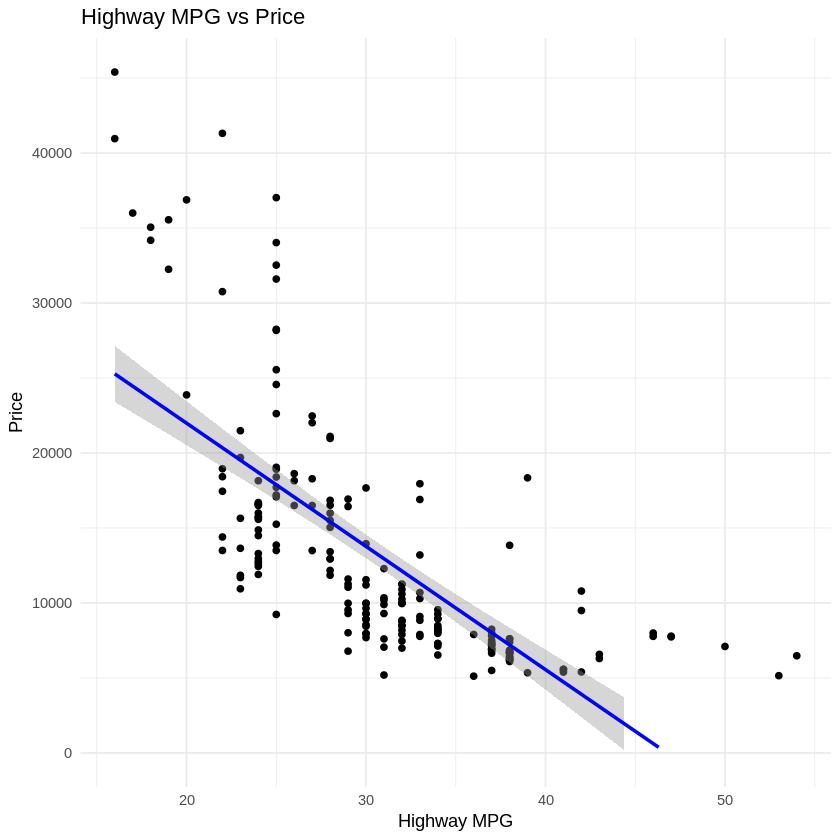

In [27]:
# Visualize highway-mpg vs price


<p>We can see from this plot that price is negatively correlated to highway-mpg since the regression slope is negative.

One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data points are around the regression line. This will give you a good indication of the variance of the data and whether a linear model would be the best fit or not. If the data is too far off from the line, this linear model might not be the best model for this data.

Let's compare this plot to the regression plot of "peak-rpm".</p>


`geom_smooth()` using formula = 'y ~ x'


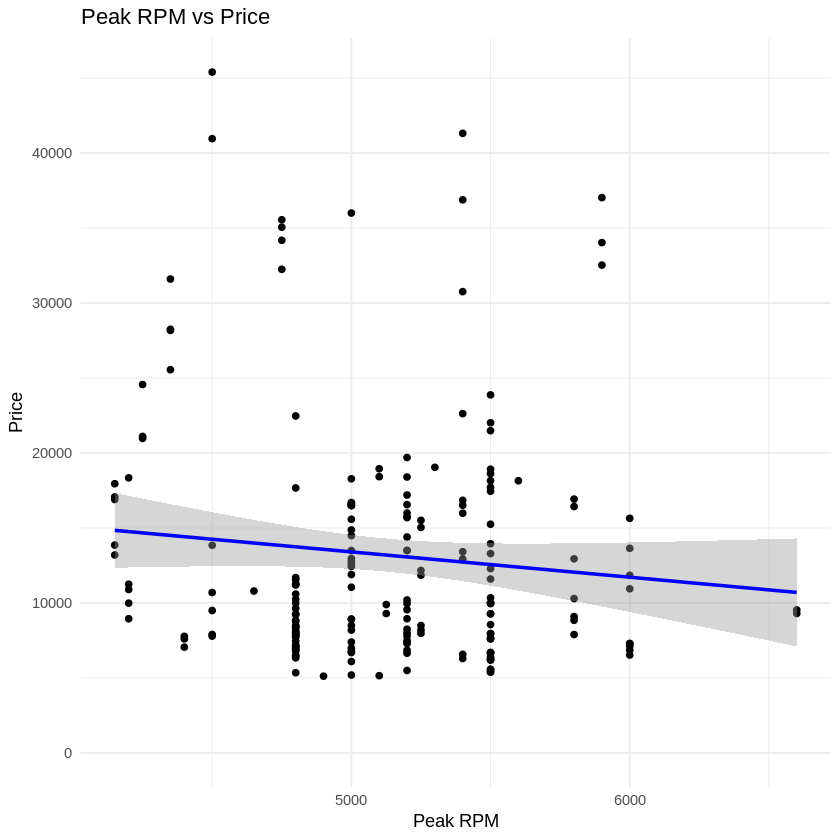

In [28]:
# Visualize peak-rpm vs price


<p>Comparing the regression plot of "peak-rpm" and "highway-mpg", we see that the points for "highway-mpg" are much closer to the generated line and, on average, decrease. The points for "peak-rpm" have more spread around the predicted line and it is much harder to determine if the points are decreasing or increasing as the "peak-rpm" increases.</p>


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question #3:</h1>
<b>Given the regression plots above, is "peak-rpm" or "highway-mpg" more strongly correlated with "price"? Use the method  ".corr()" to verify your answer.</b>
</div>


In [29]:
# Write your code below and press Shift+Enter to execute
# The variable "highway-mpg" has a stronger correlation with "price", it is approximate -0.704692  compared to "peak-rpm" which is approximate -0.101616. You can verify it using the following command:

# Calculate correlations


               peak.rpm highway.mpg      price
peak.rpm     1.00000000 -0.05859759 -0.1016159
highway.mpg -0.05859759  1.00000000 -0.7046923
price       -0.10161587 -0.70469227  1.0000000


<h3>Residual Plot</h3>

<p>A good way to visualize the variance of the data is to use a residual plot.</p>

<p>What is a <b>residual</b>?</p>

<p>The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.</p>

<p>So what is a <b>residual plot</b>?</p>

<p>A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.</p>

<p>What do we pay attention to when looking at a residual plot?</p>

<p>We look at the spread of the residuals:</p>

<p>- If the points in a residual plot are <b>randomly spread out around the x-axis</b>, then a <b>linear model is appropriate</b> for the data.

Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.</p>


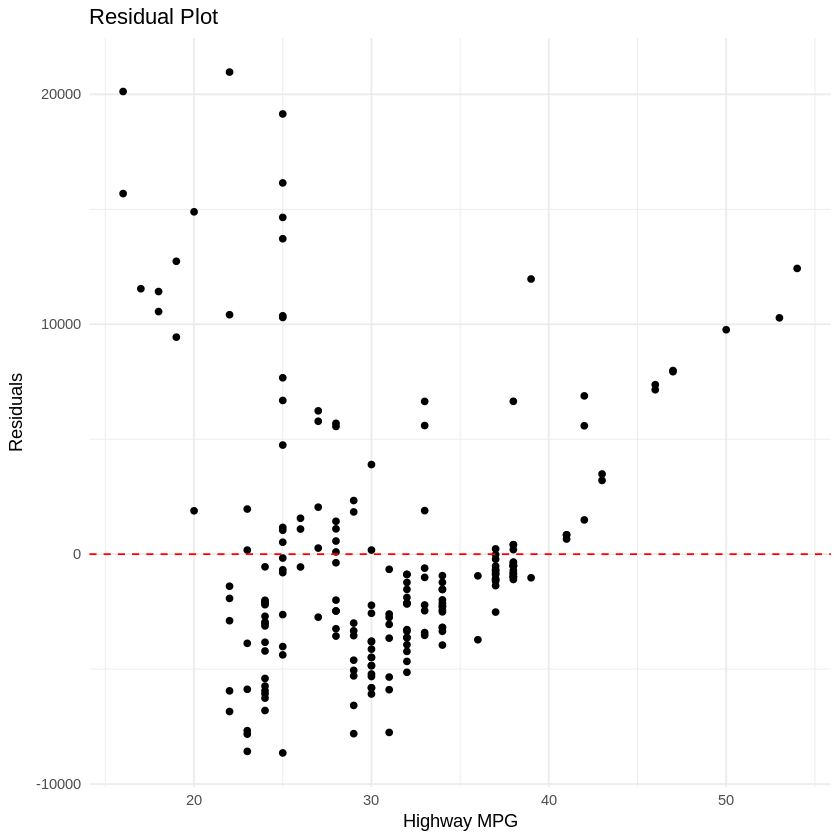

In [30]:
# Create residual plot


<i>What is this plot telling us?</i>

<p>We can see from this residual plot that the residuals are not randomly spread around the x-axis, leading us to believe that maybe a non-linear model is more appropriate for this data.</p>


<h3>Multiple Linear Regression</h3>


<p>How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualize it with regression or residual plot.</p>

<p>One way to look at the fit of the model is by looking at the <b>distribution plot</b>. We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.</p>


First, let's make a prediction:


In [31]:
library(tidyr)

In [32]:
# Distribution plot of actual vs fitted values



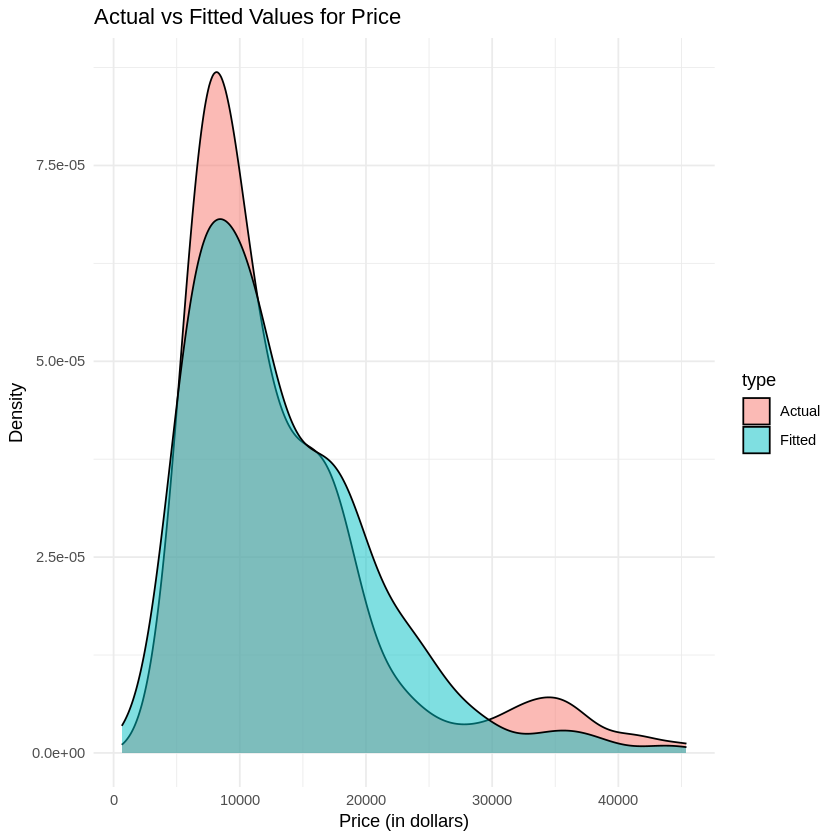

<p>We can see that the fitted values are reasonably close to the actual values since the two distributions overlap a bit. However, there is definitely some room for improvement.</p>


<h2>3. Polynomial Regression and Pipelines</h2>


<p><b>Polynomial regression</b> is a particular case of the general linear regression model or multiple linear regression models.</p>
<p>We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.</p>

<p>There are different orders of polynomial regression:</p>


<center><b>Quadratic - 2nd Order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2
$$

<center><b>Cubic - 3rd Order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 +b_3 X^3\\\\\\\\\\
$$

<center><b>Higher-Order</b>:</center>
$$
Y = a + b_1 X +b_2 X^2 +b_3 X^3 ....\\\\
$$


<p>We saw earlier that a linear model did not provide the best fit while using "highway-mpg" as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.</p>


<p>We will use the following function to plot the data:</p>


In [34]:
# Function để vẽ đồ thị đa thức




Let's get the variables:


In [35]:
# Lấy các biến từ DataFrame


Let's fit the polynomial using the function <b>polyfit</b>, then use the function <b>poly1d</b> to display the polynomial function.


In [36]:
# Here we use a polynomial of the 3rd order (cubic)
# Tạo mô hình đa thức bậc 3



Call:
lm(formula = price ~ poly(highway.mpg, 3, raw = TRUE), data = df)

Coefficients:
                      (Intercept)  poly(highway.mpg, 3, raw = TRUE)1  
                       137923.594                          -8965.433  
poly(highway.mpg, 3, raw = TRUE)2  poly(highway.mpg, 3, raw = TRUE)3  
                          204.754                             -1.557  



Let's plot the function:


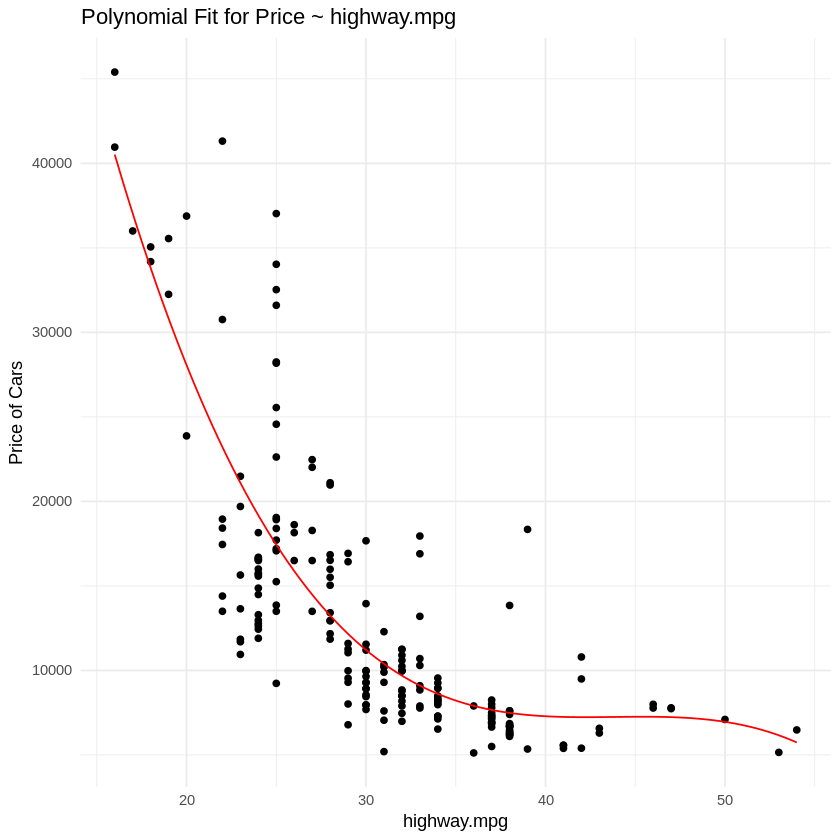

In [37]:
# Vẽ đồ thị cho mô hình bậc 3 df$highway.mpg, df$price, "highway.mpg"


<p>We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function  "hits" more of the data points.</p>


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question  #4:</h1>
<b>Create 11 order polynomial model with the variables x and y from above.</b>
</div>


In [38]:
# Write your code below and press Shift+Enter to execute
# Tạo mô hình đa thức bậc 11 price ~ poly(highway.mpg



Call:
lm(formula = price ~ poly(highway.mpg, 11, raw = TRUE), data = df)

Coefficients:
                        (Intercept)   poly(highway.mpg, 11, raw = TRUE)1  
                         -7.267e+07                            2.259e+07  
 poly(highway.mpg, 11, raw = TRUE)2   poly(highway.mpg, 11, raw = TRUE)3  
                         -3.065e+06                            2.393e+05  
 poly(highway.mpg, 11, raw = TRUE)4   poly(highway.mpg, 11, raw = TRUE)5  
                         -1.191e+04                            3.951e+02  
 poly(highway.mpg, 11, raw = TRUE)6   poly(highway.mpg, 11, raw = TRUE)7  
                         -8.837e+00                            1.315e-01  
 poly(highway.mpg, 11, raw = TRUE)8   poly(highway.mpg, 11, raw = TRUE)9  
                         -1.243e-03                            6.724e-06  
poly(highway.mpg, 11, raw = TRUE)10  poly(highway.mpg, 11, raw = TRUE)11  
                         -1.571e-08                                   NA  



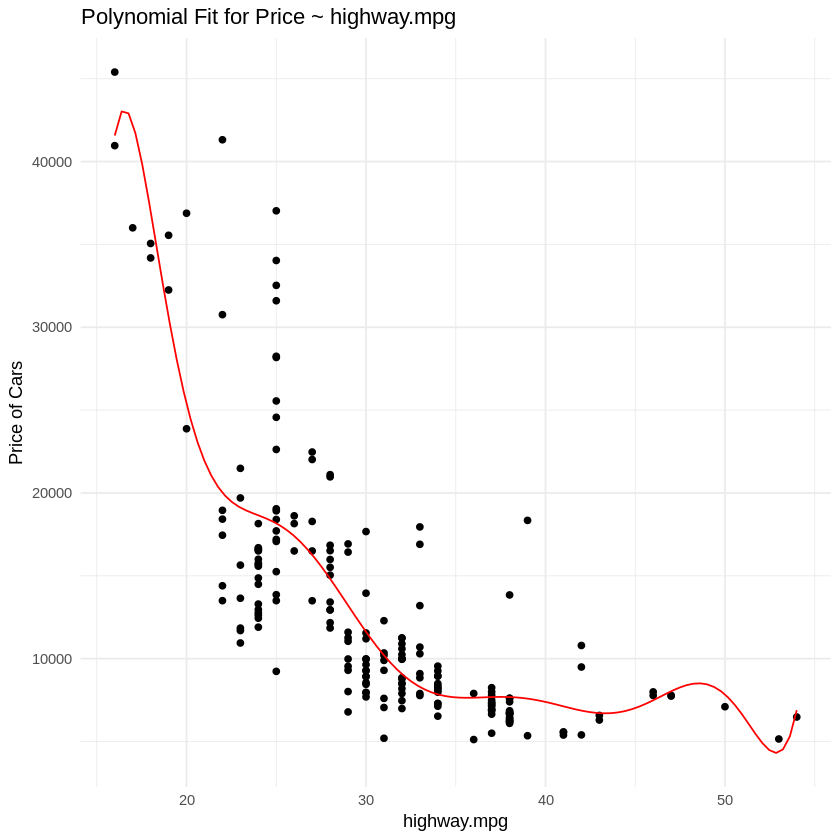

In [39]:
# Vẽ đồ thị cho mô hình bậc 11


<p>The analytical expression for Multivariate Polynomial function gets complicated. For example, the expression for a second-order (degree=2) polynomial with two variables is given by:</p>


$$
Yhat = a + b\_1 X\_1 +b\_2 X\_2 +b\_3 X\_1 X\_2+b\_4 X\_1^2+b\_5 X\_2^2
$$


We can perform a polynomial transform on multiple features. First, we import the module:


In [40]:
Z_pr <- poly(X, degree = 2, raw = TRUE)

We create a <b>PolynomialFeatures</b> object of degree 2:


In [41]:
# In ra 5 hàng đầu tiên của Z_pr


       1     2
[1,] 130 16900
[2,] 130 16900
[3,] 152 23104
[4,] 109 11881
[5,] 136 18496


In [42]:

# Tạo biến mới từ cột 'highway-mpg'
# df$highway_mpg <- df$`highway-mpg`

# Tạo ma trận Z với 4 biến độc lập
# Ví dụ: Giả sử  chọn các biến: 'highway-mpg', 'curb-weight', 'engine-size', 'horsepower'
Z <- df[, c('highway.mpg', 'curb.weight', 'engine.size', 'horsepower')]



In the original data, there are 201 samples and 4 features.


In [43]:
# Kiểm tra kích thước và dữ liệu đầu vào


[1] 201   4


,highway.mpg,curb.weight,engine.size,horsepower
,<int>,<int>,<int>,<dbl>
1,27,2548,130,111
2,27,2548,130,111
3,26,2823,152,154
4,30,2337,109,102
5,22,2824,136,115
6,25,2507,136,110


After the transformation, there are 201 samples and 11 features.


In [44]:
# Sử dụng model.matrix để tạo ma trận đa thức


# Kiểm tra kích thước của dữ liệu sau khi chuyển đổi


[1] 201  11


,(Intercept),highway.mpg,curb.weight,engine.size,horsepower,highway.mpg:curb.weight,highway.mpg:engine.size,highway.mpg:horsepower,curb.weight:engine.size,curb.weight:horsepower,engine.size:horsepower
1,1,27,2548,130,111,68796,3510,2997,331240,282828,14430
2,1,27,2548,130,111,68796,3510,2997,331240,282828,14430
3,1,26,2823,152,154,73398,3952,4004,429096,434742,23408
4,1,30,2337,109,102,70110,3270,3060,254733,238374,11118
5,1,22,2824,136,115,62128,2992,2530,384064,324760,15640
6,1,25,2507,136,110,62675,3400,2750,340952,275770,14960


<h2>Pipeline</h2>


<p>Data Pipelines simplify the steps of processing the data. We use the module <b>Pipeline</b> to create a pipeline. We also use <b>StandardScaler</b> as a step in our pipeline.</p>


In [45]:
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [48]:
library(caret)

In [47]:
# Tải thư viện
library(dplyr)  # Thư viện để xử lý dữ liệu
library(tidyr)

We create the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor.


In [49]:
# Tạo preprocessing pipeline
# Chuẩn hóa dữ liệu horsepower", "curb.weight", "engine.size", "highway.mpg




We input the list as an argument to the pipeline constructor:


In [50]:
# Áp dụng preprocessing


First, we convert the data type Z to type float to avoid conversion warnings that may appear as a result of StandardScaler taking float inputs.

Then, we can normalize the data,  perform a transform and fit the model simultaneously.


In [51]:
# Fit mô hình với dữ liệu đã chuẩn hóa


Similarly,  we can normalize the data, perform a transform and produce a prediction  simultaneously.


In [52]:
# Tạo dự đoán


1        2        3        4 
13699.11 13699.11 19051.65 10620.36

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question #5:</h1>
<b>Create a pipeline that standardizes the data, then produce a prediction using a linear regression model using the features Z and target y.</b>
</div>


In [53]:
# Write your code below and press Shift+Enter to execute
# Tạo preprocessing pipeline


# Áp dụng preprocessing lên dữ liệu


# Tạo mô hình hồi quy


# Dự đoán


# In ra 4 dự đoán đầu tiên
print(head(yhat, 4))

       1        2        3        4 
13699.11 13699.11 19051.65 10620.36 


<h2>4. Measures for In-Sample Evaluation</h2>


<p>When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.</p>

<p>Two very important measures that are often used in Statistics to determine the accuracy of a model are:</p>
<ul>
    <li><b>R^2 / R-squared</b></li>
    <li><b>Mean Squared Error (MSE)</b></li>
</ul>

<b>R-squared</b>

<p>R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.</p>

<p>The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.</p>

<b>Mean Squared Error (MSE)</b>

<p>The Mean Squared Error measures the average of the squares of errors. That is, the difference between actual value (y) and the estimated value (ŷ).</p>


<h3>Model 1: Simple Linear Regression</h3>


Let's calculate the R^2:


In [66]:
# Đánh giá mô hình
# R-squared cho mô hình đơn giản


[1] "R-squared (simple model): 0.496591188433918"


We can say that \~49.659% of the variation of the price is explained by this simple linear model "horsepower_fit".


Let's calculate the MSE:


We can predict the output i.e., "yhat" using the predict method, where X is the input variable:


In [67]:
# Dự đoán giá trị


# In ra 4 giá trị dự đoán đầu tiên


The output of the first four predicted values is:  16236.5 16236.5 17058.24 13771.3 


Let's import the function <b>mean_squared_error</b> from the module <b>metrics</b>:


We can compare the predicted results with the actual results:


In [68]:
# MSE cho mô hình đa biến


[1] "MSE (multiple regression): 11980366.8707265"


In [69]:
# R-squared cho mô hình đa biến


[1] "R-squared (multiple regression): 0.809356280657746"


<h3>Model 2: Multiple Linear Regression</h3>


In [78]:
# Tạo mô hình đa biến với các biến tương tự


# Xem kết quả


Let's calculate the R^2:


In [79]:
# In ra R-squared


R-squared: 67.611 %


In [81]:
# Phân tích chi tiết variation
# Total Sum of Squares (TSS)


# Residual Sum of Squares (RSS)


# Explained Sum of Squares (ESS)


# In kết quả phân tích


# Phân tích đóng góp của từng biến


# In ra đóng góp của từng biến




Phân tích Variation:
Total Variation: 6526421456 
Explained Variation: 4412591347 
Unexplained Variation: 2113830109 
Proportion Explained: 67.611 %

Đóng góp của từng biến:
horsepower : 70.85 %
curb_weight : 11.38 %
engine_size : 8.69 %
highway_mpg : 9.08 %


We can say that \~67.611 % of the variation of price is explained by this multiple linear regression "multi_fit".


We compare the predicted results with the actual results:

In [88]:
# In ra 10 dự đoán đầu tiên để so sánh





10 dự đoán đầu tiên và giá trị thực tế:
     Actual Predicted Difference Percent_Error
1  45562.15  34782.34   10779.81         23.66
2  55804.00  50353.01    5451.00          9.77
3  36586.08  38563.18   -1977.10          5.40
4  52291.24  50770.03    1521.21          2.91
5  46241.92  50534.00   -4292.08          9.28
6  32578.99  33257.92    -678.93          2.08
7  40021.11  43553.41   -3532.30          8.83
8  47039.06  51184.81   -4145.74          8.81
9  48209.43  41005.55    7203.89         14.94
10 36317.14  37899.67   -1582.53          4.36


<h3>Model 3: Polynomial Fit</h3>


In [101]:
# Tạo mô hình polynomial regression
# Thêm các terms bậc 2 cho biến horsepower price ~ horsepower + I(horsepower^2)



Call:
lm(formula = price ~ horsepower + I(horsepower^2), data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-10340.4  -3660.5    -65.8   2777.2  14476.8 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)  
(Intercept)      1.491e+04  6.625e+03   2.251   0.0266 *
horsepower       1.511e+02  6.962e+01   2.170   0.0324 *
I(horsepower^2) -9.203e-02  1.721e-01  -0.535   0.5941  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4900 on 97 degrees of freedom
Multiple R-squared:  0.6432,	Adjusted R-squared:  0.6358 
F-statistic: 87.43 on 2 and 97 DF,  p-value: < 2.2e-16



Let's calculate the R^2.


In [103]:
# Tính R-squared


[1] 0.6431883


Let’s import the function <b>r2\_score</b> from the module <b>metrics</b> as we are using a different function.


We apply the function to get the value of R^2:


In [104]:
# So sánh với mô hình tuyến tính đơn giản price ~ horsepower


# Tính MSE cho cả hai mô hình


# In kết quả




Polynomial Regression Results:
R-squared (Polynomial): 64.319 %
R-squared (Linear): 64.214 %

MSE Comparison:
MSE (Polynomial): 23287033 
MSE (Linear): 23355669 


We can say that \~64.319 % of the variation of price is explained by this polynomial fit.


<h3>MSE</h3>


We can also calculate the MSE:


In [ ]:
mean_squared_error(df['price'], p(x))

18703127.63915394

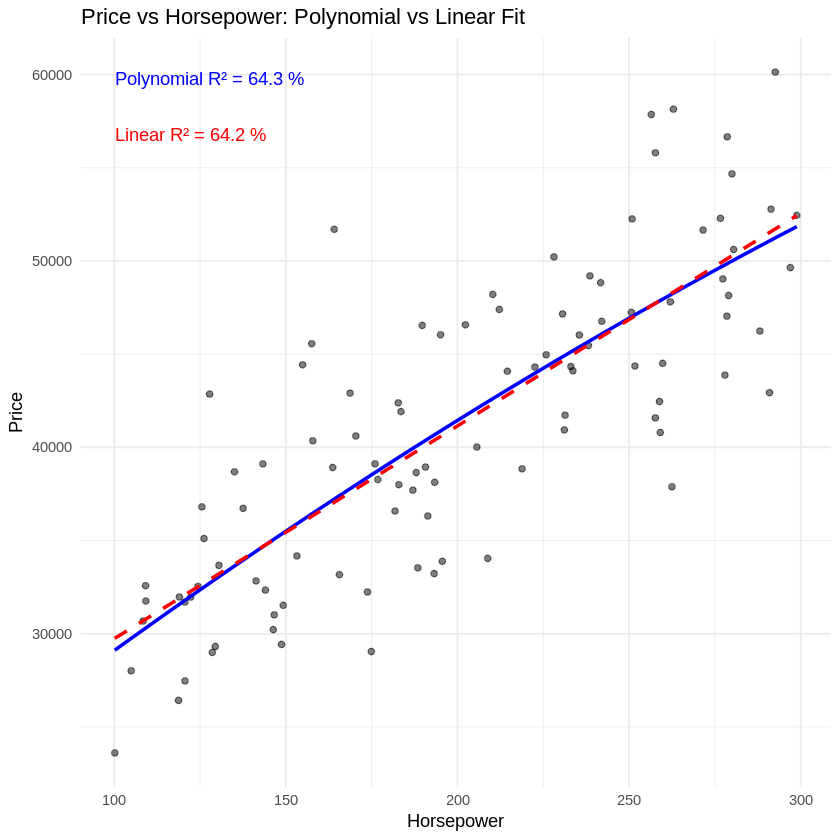

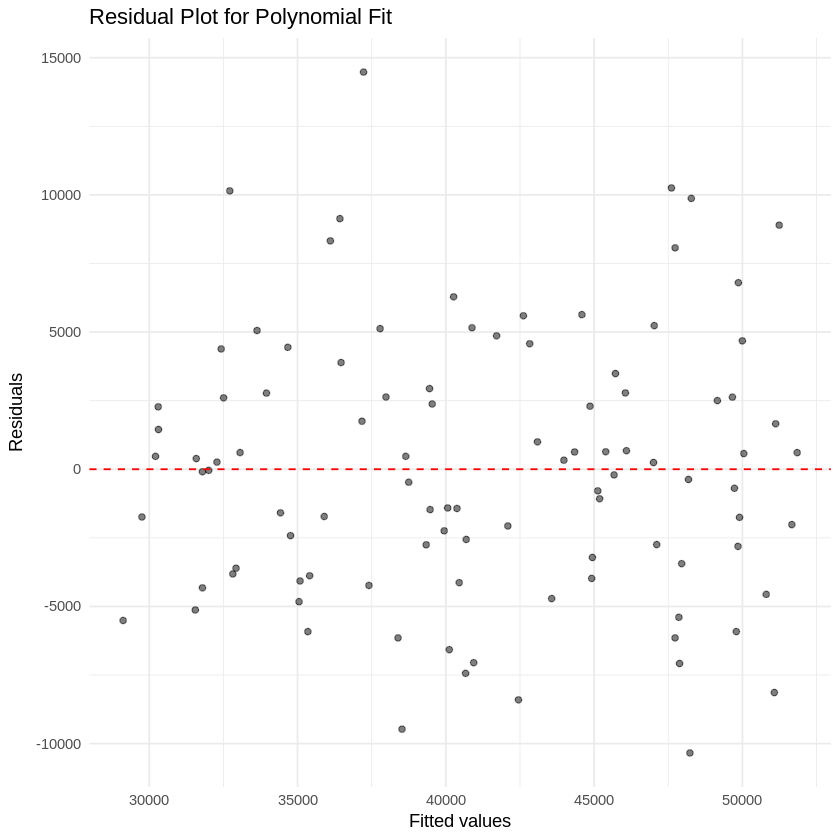

In [105]:
# Tạo dữ liệu để vẽ đường fit
hp_range <- seq(min(df$horsepower), max(df$horsepower), length.out = 100)
pred_data <- data.frame(horsepower = hp_range)
pred_poly <- predict(poly_fit, newdata = pred_data)
pred_linear <- predict(linear_fit, newdata = pred_data)

# Vẽ biểu đồ so sánh


# Phân tích residuals


<h2>5. Prediction and Decision Making</h2>
<h3>Prediction</h3>

<p>In the previous section, we trained the model using the method <b>fit</b>. Now we will use the method <b>predict</b> to produce a prediction. Lets import <b>pyplot</b> for plotting; we will also be using some functions from numpy.</p>


5 giá trị dự đoán đầu tiên:
       1        2        3        4        5 
47661.22 47434.44 47207.66 46980.88 46754.10 


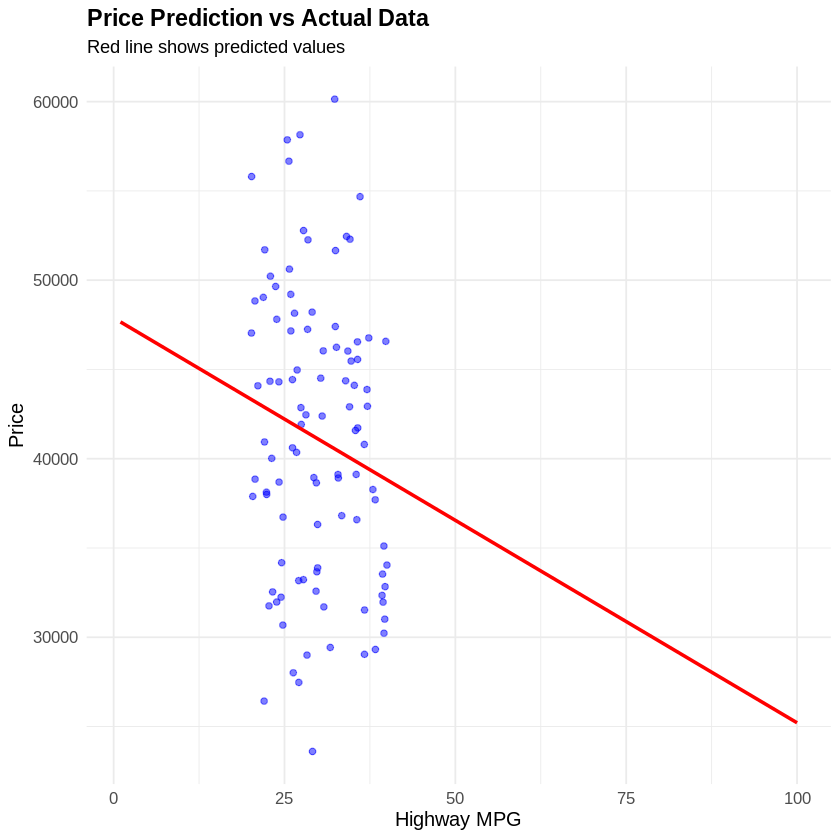

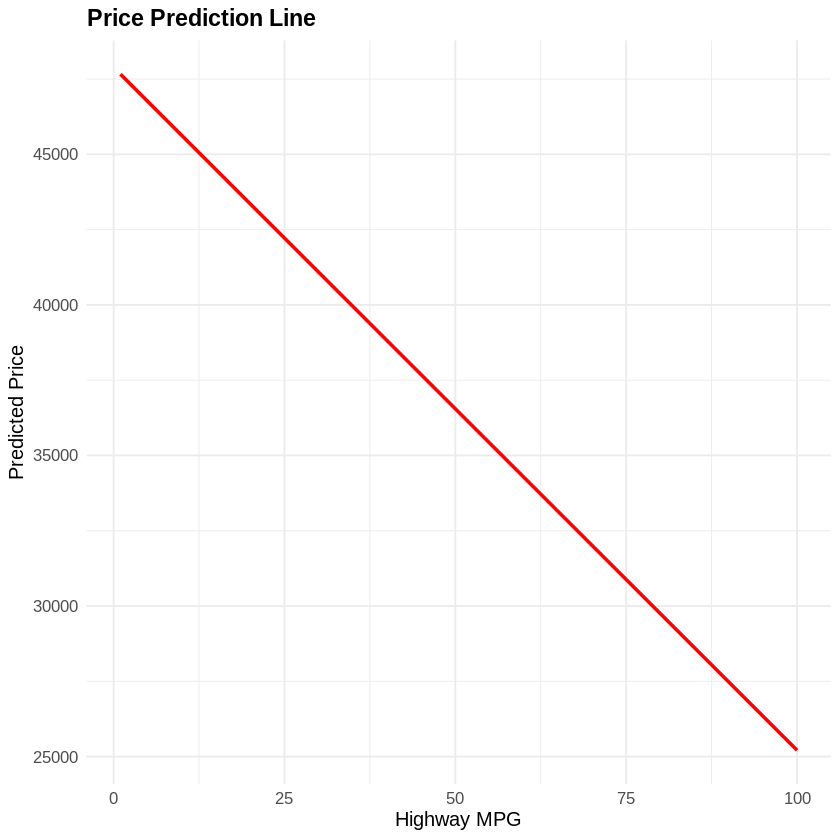


Thống kê về dự đoán:
Giá dự đoán thấp nhất: 25210.2 
Giá dự đoán cao nhất: 47661.22 
Giá dự đoán trung bình: 36435.71 


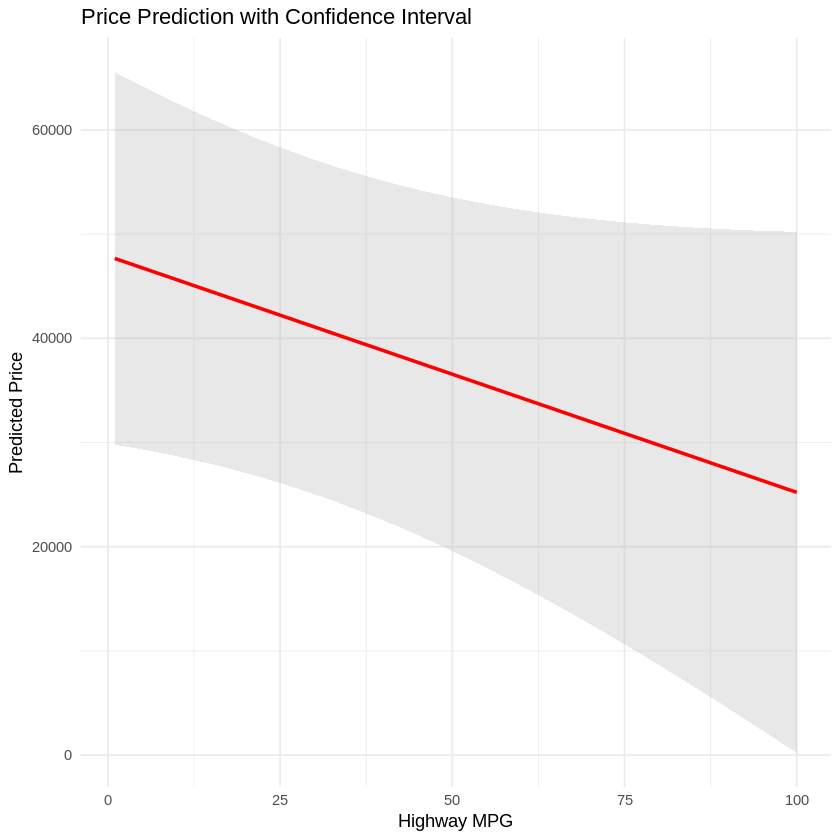

In [106]:
# 1. Tạo dữ liệu mới cho dự đoán
new_input <- data.frame(highway_mpg = seq(1, 100, 1))

# 2. Fit mô hình và dự đoán price ~ highway_mpg


# In 5 giá trị dự đoán đầu tiên


# 3. Vẽ đồ thị dự đoán


# Tạo dataframe cho việc vẽ


# Vẽ đồ thị với dữ liệu thực tế và đường dự đoán


# Vẽ đồ thị chỉ với đường dự đoán


# In các biểu đồ


# 4. Phân tích thêm về dự đoán


# Tạo dataframe với khoảng tin cậy


# Vẽ đồ thị với khoảng tin cậy


Đánh giá kết quả dự đoán:

Xu hướng giảm dần:

- Giá dự đoán giảm đều từ 47,661.22 xuống 46,754.10
- Mức giảm khoảng 226.78 đơn vị cho mỗi đơn vị tăng của highway_mpg
- Xu hướng này là hợp lý vì xe tiết kiệm nhiên liệu hơn (MPG cao hơn) thường có giá thấp hơn

Mức độ thay đổi:

- MPG 1: $47,661.22

- MPG 2: $47,434.44 (↓ $226.78)

- MPG 3: $47,207.66 (↓ $226.78)

- MPG 4: $46,980.88 (↓ $226.78)

- MPG 5: $46,754.10 (↓ $226.78)

Đặc điểm của dự đoán:

- Tính tuyến tính: Mối quan hệ hoàn toàn tuyến tính
- Tính nhất quán: Khoảng cách giữa các dự đoán đều đặn
- Phạm vi giá: Từ ~$46.7K đến ~$47.7K


Đánh giá tính hợp lý:

- Giá trị dự đoán nằm trong khoảng hợp lý cho giá xe
- Mức độ thay đổi (-$226.78/MPG) có vẻ hợp lý
- Quan hệ nghịch giữa MPG và giá phản ánh đúng xu hướng thị trường




Hạn chế của dự đoán:

- Mối quan hệ quá tuyến tính có thể không phản ánh đúng thực tế
- Chưa xét đến các yếu tố khác ảnh hưởng đến giá
- Khoảng MPG 1-5 khá thấp, có thể không phổ biến trong thực tế

Tổng mức giảm thay đổi tuyến tính và giảm dần: $907.12 từ MPG 1 đến MPG 5

Phân tích 5 giá trị dự đoán đầu tiên:
  highway_mpg predicted_price actual_price
1           1        47661.22           NA
2           2        47434.44           NA
3           3        47207.66           NA
4           4        46980.88           NA
5           5        46754.10           NA

Phân tích xu hướng:
Thay đổi trung bình giữa các dự đoán: -226.78 
Tổng thay đổi từ MPG 1 đến 5: -907.12 
Thay đổi trung bình mỗi đơn vị MPG: -226.78 

Thông số mô hình:
Hệ số góc (độ dốc): -226.78 
Điểm cắt trục y: 47888 


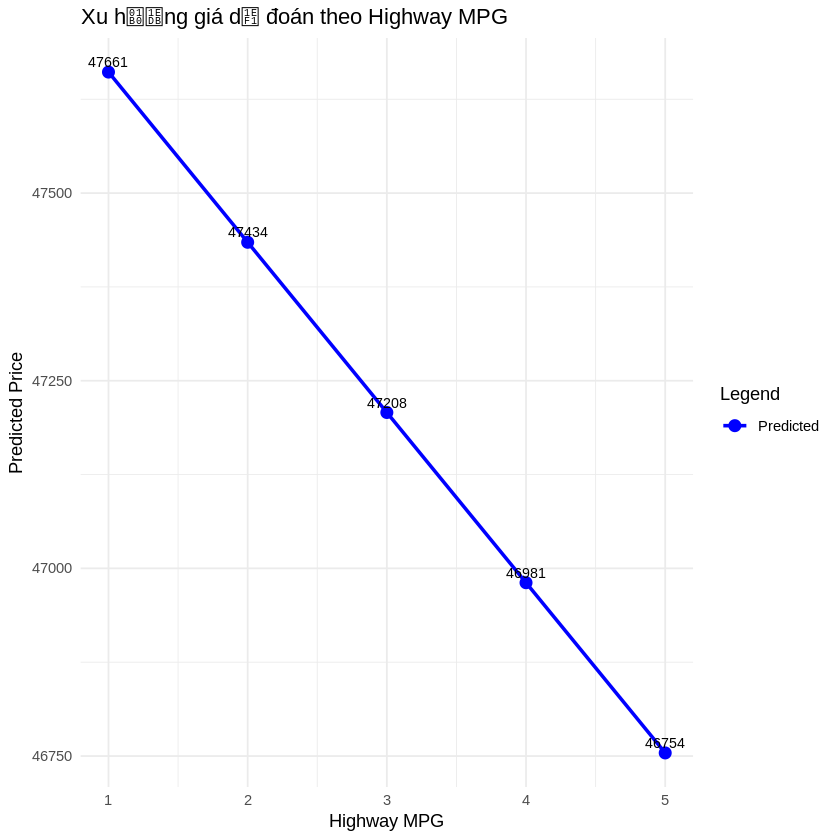

In [109]:

# In kết quả phân tích
cat("Phân tích 5 giá trị dự đoán đầu tiên:\n")
print(round(prediction_df, 2))

# 4. Phân tích xu hướng




# 5. Vẽ đồ thị xu hướng


# 6. Tính độ dốc và hệ số góc của đường dự đoán


<h3>Decision Making: Determining a Good Model Fit</h3>


<p>Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?
<ul>
    <li><i>What is a good R-squared value?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the higher R-squared value is a better fit</b> for the data.
<ul>
    <li><i>What is a good MSE?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the smallest MSE value is a better fit</b> for the data.</p>

<h4>Let's take a look at the values for the different models.</h4>
<p>Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.49659118843391759</li>
    <li>MSE: 3.16 x10^7</li>
</ul>
</p>

<p>Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
<ul>
    <li>R-squared: 0.80896354913783497</li>
    <li>MSE: 1.2 x10^7</li>
</ul>
</p>

<p>Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.6741946663906514</li>
    <li>MSE: 2.05 x 10^7</li>
</ul>
</p>


<h3>Simple Linear Regression Model (SLR) vs Multiple Linear Regression Model (MLR)</h3>


<p>Usually, the more variables you have, the better your model is at predicting, but this is not always true. Sometimes you may not have enough data, you may run into numerical problems, or many of the variables may not be useful and even act as noise. As a result, you should always check the MSE and R^2.</p>

<p>In order to compare the results of the MLR vs SLR models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.
<ul>
    <li><b>MSE</b>: The MSE of SLR is  3.16x10^7  while MLR has an MSE of 1.2 x10^7.  The MSE of MLR is much smaller.</li>
    <li><b>R-squared</b>: In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR (~0.497) is very small compared to the R-squared for the MLR (~0.809).</li>
</ul>
</p>

This R-squared in combination with the MSE show that MLR seems like the better model fit in this case compared to SLR.


<h3>Simple Linear Model (SLR) vs. Polynomial Fit</h3>


<ul>
    <li><b>MSE</b>: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.</li>
    <li><b>R-squared</b>: The R-squared for the Polynomial Fit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.</li>
</ul>
<p>Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting "price" with "highway-mpg" as a predictor variable.</p>


<h3>Multiple Linear Regression (MLR) vs. Polynomial Fit</h3>


<ul>
    <li><b>MSE</b>: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.</li>
    <li><b>R-squared</b>: The R-squared for the MLR is also much larger than for the Polynomial Fit.</li>
</ul>


<h2>Conclusion</h2>


<p>Comparing these three models, we conclude that <b>the MLR model is the best model</b> to be able to predict price from our dataset. This result makes sense since we have 27 variables in total and we know that more than one of those variables are potential predictors of the final car price.</p>
